# MADDPG for Multi-Agent Collaboration and Competition Task

In this project we have trained a multi agent policy gradient reinforcement learning agent to solve a [Multi-Agent Actor-Critic for Mixed
Cooperative-Competitive Environments, MADDPG](https://papers.nips.cc/paper/2017/file/68a9750337a418a86fe06c1991a1d64c-Paper.pdf). 
In details, the environment built in 3D space with two tennis rocket learning to keep to ball in the game as long as possible. 
There are 2 action available for controlling the each rocket in a continuous space for jumping and move back and forth.
The measured stated contains position, velocity of the ball and two tennis rocket. 
The task designed episodically and each episode last maximum of until the ball fall down. 
Our solution uses a multi agent policy gradient based reinforcement learning algorithm called 
[Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments, MADDPG](https://papers.nips.cc/paper/2017/file/68a9750337a418a86fe06c1991a1d64c-Paper.pdf).
The optimal policy should maximize its expected discounted reward $\mu^*(s)=\max_\pi \mathbb{E}[\sum_i \gamma^i r_i]$ by keeping the ball from falling down.
In addition to the vanilla MADDPG algorithm I applied a prioritized reply buffer to solve the environment. 
In the following I will describe each step of our method in details and present the results. 
In this report the reference to the ideas and publications provide via hyper-link.

#### Solved Environment for collaborative and competitive tennis game.

![](../data/tennis-learned.gif)


## Learning Algorithm 

*  **Reinforcement Learning**:  is a type of machine learning method which tries to learn an appropriate closed-loop controller by simply interacting with the process and incrementally improving the control behavior. The goal of reinforcement learning algorithms is to maximize a numerical reward signal by discovering which control commands i.e. actions yield the most reward. Using reinforcement learning algorithms, a controller can be learned with only a small amount of prior knowledge of the process. Reinforcement learning aims at learning control policies for a system in situations where the training
  information is basically provided in terms of judging success or failure of the observed system behavior. 

* **Markov Decision Process**: The type of control problems we are trying to learn in this work are discrete time control problems and can be formulated as  a Markov decision process(MDP). An MDP has four components: a set $S$ of states, a set $A$ of actions, a stochastic transition probability function $p(s, a, s' )$  describing system behavior, and an immediate reward or cost function $c  : S × A → R$. The state of the system at time $t$, characterizes the current situation of the agent in the world, denoted by $s(t)$. The chosen action by agent at time step $t$ is denoted by $a(t)$. The immediate reward or cost is the consequence of the taken action and function of state and action. Since the rewards for the taken action can be formulated as cost, the goal of the control agent would be to find an optimal policy $π ∗ : S → A$ that minimizes the cumulated cost for all states. Basically, in reinforcement learning we
  try to choose actions over time to minimize/maximize the expected value of the total cost/reward.

* **Q-Learning**: In many real-world problems the state transition probabilities and the reward functions are not given explicitly. But, only a set of states $S$ and a set of actions $A$ are known and we have to learn the dynamic system behaviors by interacting with it. Methods of temporal differences such as Q-Learning were invented to perform learning and optimization in exactly these circumstances. The basic idea in Q-learning is to iteratively learn the value function, Q-function, that maps state-action pairs to expected optimal path costs. The goal of a Q-learning is to find optimal policy which returns highest expected reward give the action-value function. In order to find the optimal action in each state we use Bellman  optimality principal. By definition that means at each time step the optimal value of action in a particular state is equal sum its action-value and discounted reward collected after that time stamp onward. The update equation for the action-value function is : $Q(S_t , A_t )\leftarrow Q(S_t , A_t ) + \alpha[R_{t+1} + \gamma \max_a' Q(S_{t+1} , a') - Q(S_t , A_t)]$. 

* **On-policy** methods attempt to evaluate or improve the policy that is used to make decisions, whereas **off-policy** methods evaluate or improve a policy different from that used to generate the data. In **on-policy** control methods the policy is generally soft, meaning that $\pi(a|s) > 0$ for all $s \in S$ and all $a \in A(s)$, but gradually shifted closer and closer to a deterministic optimal policy. The on-policy approach in the preceding section is actually a compromise—it learns action values not for the optimal policy, but for a near-optimal policy that still explores.

* **Batch Reinforcement Learning**: At each time point $t$ it observes the environment state $s_t$ , takes an action $a_t$ , and receives feedbacks from the environment including next state $s_{t+1}$ and the instantaneous reward $r_t$. The sole information that we assume available to learn the problem is the one obtained from the observation of a certain number of one-step system transitions (from $t$ to $t + 1$). The agent interacts with the control system in the environment and gathers state transitions in a set of four-tuples $(s_t , a_t , r_t , s_{t+1 })$. Except for very special conditions, it is not possible to exactly determine an optimal control policy from a finites et of transition samples. Batch reinforcement learning aims at computing an approximation of such optimal policy $\pi^∗$, from a set of four-tuples: $D=[(s^l_{t}, a^l_{t} , r^l_{t} , s^l_{t+1}), l = 1,..., \#D]$.  This set could be generated by gathering samples corresponding to one single trajectory (or episode) as well as by considering several independently generated trajectories or multi-step episodes. Training algorithms with growing batch have two major benefits. First, from the interaction perspective, it is very similar to the ’pure’ online approach. Second, from the learning point of view, it is similar to an
  off-line approach that all the trajectory samples are used for training the algorithm. The main idea in growing batch is to alternate between phases of exploration, where a set of training examples is grown by interacting with the system, and phases of learning, where the whole batch of observations is used. The distribution of the state transitions in the provided batch must resemble the ’true’ transition probabilities of the system in order to allow the derivation of good policies. In practice, exploration cultivates the quality of learned policies by providing more variety in the distribution of the trajectory samples.

* **Policy Gradient Methods** learn a parameterized policy that can select actions without consulting a value function. A value function may still be used to learn the policy parameter, but is  not required for action selection. We use the notation $\theta \in \mathbb R^{d'}$ for the policy’s parameter vector. Thus we write $\pi(a|s, \theta) = Pr\{A_t = a | S_t = s, \theta_t =\theta\}$ for the probability that action a is taken at time $t$  given that the environment is in state s at time $t$ with parameter $\theta$. If a method uses a learned value function as well, then the value function’s weight vector is denoted $w \in \mathbb R^d$ as usual, as in $\hat{v}(s,w)$.  We use the gradient of some scaler value $J(\theta)$ with respect to policy parameters to learn the policy. The method aim to maximize the performance therefore the parameter updates uses the gradient ascent:  $ \theta_{t+1}=\theta_t + \alpha\widehat{\nabla J(\theta_t)}$, where $\widehat{\nabla J(\theta_t)}\in \mathbb R^d$ is a stochastic estimate whose expectation approximates the gradient  of the performance measure with respect to its argument $\theta_t$ . All methods that follow this general schema we call **policy gradient methods**, whether or not they also learn an approximate value function. Methods that learn approximations to both policy and value functions are often called **actor–critic methods**, where **‘actor’** is a reference to the learned policy, and **‘critic’** refers to the learned value function, usually a state-value function.

  * One advantage of parameterizing policies according to the soft-max in action preferences is that the approximate policy can approach a deterministic policy, whereas with $\epsilon-greedy$ action selection over action values there is always an $\epsilon$ probability of selecting a random action.
  * A second advantage of parameterizing policies according to the soft-max in action preferences is that it enables the selection of actions with arbitrary probabilities. In problems with significant function approximation, the best approximate policy may be stochastic.

* **Actor-Critic Method** we use state-value function to critic the actor function. Basically we use the state-value function to bootstrapping (updating  the value estimate for a state from the estimated values of subsequent states). This is a useful distinction, for only through bootstrapping do we introduce bias and an asymptotic dependence on the quality of the function approximation. The bias introduced through bootstrapping and reliance on the state representation is often beneficial because it reduces variance and accelerates learning. Actor-critic methods are TD methods that have a separate memory structure to explicitly represent the policy independent of the value function. The policy structure is known as the *actor*, because it is used to select actions, and the estimated value function is known as the *critic*, because it criticizes the actions made by the actor. Learning is always on-policy: the critic must learn about and critique whatever policy is currently being followed by the actor. The critique takes the form of a TD error. This scalar signal is the sole output of the critic and drives all learning in both actor and critic.

  ​                                                                                          ![img](../data/actor-critic-diag.png)

* **CONTINUOUS CONTROL WITH DEEP REINFORCEMENT LEARNING(DDGP)** while DQN solves problems with high-dimensional observation spaces, it can only handle discrete and low-dimensional action spaces. Many tasks of interest, most notably physical control tasks, have continuous (real valued) and high dimensional action spaces. DQN cannot be straightforwardly applied to continuous domains since it relies on a finding the action that maximizes the action-value function, which in the continuous valued case requires an iterative optimization process at every step. An obvious approach to adapting deep reinforcement learning methods such as DQN to continuous domains is to to simply discretize the action space. However, this has many limitations, most notably the curse of dimensionality: the number of actions increases exponentially with the number of degrees of freedom.  Such large action spaces are difficult to explore efficiently, and thus successfully training DQN-like networks in this context is likely intractable. Additionally, naive discretization of action spaces needlessly throws away information about the structure of the action domain, which may be essential for solving many problems. Here we combine the actor-critic approach with insights from the recent success of Deep Q Network (DQN). Prior to DQN, it was generally believed that learning value functions using large, non-linear function approximators was difficult and unstable. DQN is able to learn value functions using such function approximators in a stable and robust way due to two innovations: 1. the network is trained off-policy with samples from a replay buffer to minimize correlations between samples; 2. the network is trained with a target Q network to give consistent targets during temporal difference backups. It is not possible to straightforwardly apply Q-learning to continuous action spaces, because in continuous spaces finding the greedy policy requires an optimization of at at every timestep; this optimization is too slow to be practical with large, unconstrained function approximators and nontrivial action space. One challenge when using neural networks for reinforcement learning is that most optimization algorithms assume that the samples are independently and identically distributed. Obviously, when the samples are generated from exploring sequentially in an environment this assumption no longer holds. Additionally, to make efficient use of hardware optimizations, it is essential to learn in minibatches, rather than online. As in DQN, we used a replay buffer to address these issues. At each timestep the actor and critic are updated by sampling a minibatch uniformly from the buffer. Because DDPG is an off-policy algorithm, the replay buffer can be large, allowing the algorithm to benefit from learning across a set of uncorrelated transitions. 

  ​													![](../data/ddpg.png) 
  [source](https://arxiv.org/pdf/1509.02971.pdf) 

* **Improvements To DDPG**:

  * **batch normalization**: it is a method of adaptive re-parametrization, motivated by the diﬃculty of training very deep models. One of the key motivations for the development of BatchNorm was the reduction of so-called *internal covariate shift* (ICS). It is a mechanism that aims to stabilize the distribution (over a mini-batch) of inputs to a given network layer during training.  It provides an elegant way of re-parameterizing almost any deep network. The re-parametrization signiﬁcantly reduces the problem of coordinating updates across many layers. To do that, we apply normalization using $\mu$ and $\sigma$ on activation of each hidden layer $H$ before applying nonlinear function: $H' = \frac{H-\mu}{\sigma}$     where      $\mu = \frac{1}{m}\sum_i H_i$,   and   $\sigma = \sqrt{\epsilon + \frac{1}{m}\sum_i(H_i-\mu)^2}$,  The major innovation of the batch normalization is that, it prevents the gradient from increasing the standard deviation or mean of $h_i$; the normalization operations remove the eﬀect of such an action and zero out its component in the gradient. 

  * **Gradient Clipping**  One difficulty that arises with optimization of deep neural networks is that large parameter gradients can lead an SGD optimizer to update the parameters strongly into a region where the loss function is much greater, effectively undoing much of the work that was needed to get to the current solution. On the face of an extremely steep cliﬀ structure, the gradient update step can move the parameters extremely far, usually jumping oﬀ of the cliﬀ structure altogether **Gradient Clipping** clips the size of the gradients to ensure optimization performs more reasonably near sharp areas of the loss surface. It can be performed in a number of ways. The basic idea is to recall that the gradient does not specify the optimal step size, but only the optimal direction within an inﬁnitesimal region. When the traditional gradient descent algorithm proposes to make a very large step, the gradient clipping heuristic intervenes to reduce the step size to be small enough that it is less likely to go outside the region where the gradient indicates the direction of approximately steepest descent. One option is to simply clip the parameter gradient element-wise before a parameter update. Another option is to clip the norm $||g||$ of the gradient g before a parameter update: $ {if}~||g||>v~then~g←\frac{g^v}{||g||}$  where $v$ is a norm threshold.

  * **Less aggressive policy update** in order to minimize the error and stabilize the policy the update the actor-critic network with less frequency, 10 times after each 20 step moves in environment.   

* **Markov Games**  In this work, we consider a multi-agent extension of Markov decision processes (MDPs) called partially observable Markov games. Given $Q(s,a)$ an agent can maximize its reward using the “greedy” strategy of always choosing the action with the highest $Q-value$. This strategy is greedy because it treats $Q(s,a)$ as a surrogate for immediate reward and then acts to maximize its immediate gain. It is optimal because the $Q-function$ is an accurate summary of future rewards.  A similar observation can be used for Markov games once we redefine $V(s)$;  to be the expected reward for the optimal policy starting from state $s$ and $Q(s,a,o)$as the  expected reward for taking action $a$ when the opponent chooses $o$ from state $s$ and continuing optimally thereafter. We can then treat the $Q(s,a,o)$ values as immediate payoffs in an unrelated sequence of matrix games (one for each state, $s$). The value of a state $s\in S$ in Markov game is $V(s)= \max_{\pi\in PD(A)}\min_{o\in O}\sum_{a\in A}Q(s,a,o)\pi_a$ where the agent policy is its probability distribution over actions $\pi\in PD(A)$ and the quality of the action $a$ against action $o$ in the state $s$ is $Q(s,a,o)= R(s,a,o)+ \gamma\sum_{s'}T(s,a,o,s')V(s')$, where $T$ is state transition probability. 

* **Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments** is a multi-agent policy gradient algorithm where agents learn a centralized critic
based on the observations and actions of all agents. This could be accomplish by adopting the framework of centralized training with decentralized execution.
Such framework allows the policies to use extra information to ease training, so long as this information is not used at test time.
 It is unnatural to do this with Q-learning, as the Q function generally cannot contain different information at training and test time.
  Therefore the method proposes a simple extension of actor-critic policy gradient methods where the critic is augmented with extra information about the policies of other agents.
 Native policy gradient algorithms perform poorly in simple multi-agent settings. The followings are the constraints which the **MADDPG** is implemented on: 
    * the learned policies can only use local information (i.e. their own observations) at execution time
    * there isn't a differentiable model of the environment dynamics
    * there isn't any particular structure on the communication method between agents (no differentiable communication channel)
   
    ![](../data/maddpg.png) 
  [source](https://papers.nips.cc/paper/2017/file/68a9750337a418a86fe06c1991a1d64c-Paper.pdf) 




### The Experiment Setup :

* Each player agent hits the ball over the net, it receives a reward of +0.1. If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.

* Each episode last as long ad the ball in the play.

* The training stopped when agent has collected $0.5$ reward points averaged over past $100$ episodes.

* The hyper parameters are equal to the original MADDPG paper, the followings are changed(similar for all the variation of the algorithm we have tried):

  * gamma :  0.99              
  * actor_learning_rate : 0.0002
  * critic_learning_rate: 0.0002
  * update_every : 1 (for calculating loss)
  * $\tau$: 0.01 (soft update factor)
  * replay memory size: 100000
  * gradient clip norm: 1.0 (gradient clipping applied to all the algorithm variations)
  * batch size: 128
  * Critic model architecture describe sequentially:
    * Fully Connected Layer: [Input size=24 (state-size), Output=128] 
    * Normalization: BatchNorm1(128)  
    * Activation: ReLU
    * Fully Connected Layer: [Input size=130, Output=128], the action are concatenated with output of fist fully connected layer
    * Activation: ReLU
    * Fully Connected Layer: [Input size=128, Output=1], the final output is state-action Q-value
  * Actor model architecture describe sequentially:
    * Fully Connected Layer: [Input size=24 (state-size), Output=128]
    * Normalization: BatchNorm1(128)  
    * Activation: ReLU
    * Fully Connected Layer: [Input size=128 (state-size), Output=128]
    * Normalization: BatchNorm1(128)  
    * Activation: ReLU
    * Fully Connected Layer: [Input size=128 (state-size), Output=2 (action-size)]
    * Activation: Tanh, the final output is vector of action which could be applied directly
    
  * Last layer of both actor and critic model weight initialized to uniform distribution in range $(-0.003,0.003)$
  * Hidden layer of both actor and critic model weight initialized to uniform distribution in range $(-1/sqrt(fanin),1/sqrt(fanin))$
  * Before applying each action generated by actor model we added noise using [Ornstein-Uhlenbeck process](https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process) to generate temporally correlated
exploration for exploration efficiency in physical control problems with inertia.
  * At the beginning of each episode the action noise hare being reset and decayed by factor 0.999 during each episode.
  * Action values are clipped between [-1,1]
  * The MADDPG agent creates 2 DDPG agents which trained in collaboration and competition with each other
  * The Replay Buffer collects samples from both players. 
  * During the training loop we sample one batch on experiences and train both DDPG agent on the same batch
  * For Prioritized Replay Buffer we sample two batch of experience, separate for each DDPG agent, due to updating experience priorities independently
     



### In the following I have trained the model and visualized the results

In [1]:
#!pip -q install ./python

In [2]:
import numpy as np
import time
import sys
import os
from collections import deque

In [4]:
#cd ../maddpgcollaboration

In [5]:
import numpy as np
import time
import sys
from collections import deque
from agent.maddpg import MADDPG
from agent_examples import maddpg_agent_config_default, maddpg_agent_config_per
from utils import (
    log_training_info,
    save_checkpoint,
    get_training_env,
    load_agent_parameters,
)

In [6]:

def maddpg_runner(
    env,
    brain_name="Reacher",
    n_episodes=100,
    agent_config={},
    target_episodes=100,
    target_score=0.5,
    num_agents=20,
    print_log=False,
    run_mode="train",
    saved_checkpoint_path="model/checkpoint.pth",
):
    """
    Deep Deterministic Policy Gradients (DDPG).
    Parameters
    ----------
    env :
    brain_name :
    n_episodes :
    agent_config :
    target_episodes :
    target_score :
    num_agents :
    print_log :
    run_mode:
    saved_checkpoint_path:
    Returns
    -------

    """
    saved_good = False
    scores = []  # episodic scores
    training_info_log = []  # training time and meta data logger
    moving_avg = deque(maxlen=100)  # last 100 scores
    agent = MADDPG(**agent_config)

    if run_mode == "test":
        load_agent_parameters(agent, saved_checkpoint_path)
        for a in agent.agents:
            a.actor_local.eval()
            a.critic_local.eval()
    ## Perform n_episodes of training
    training_start_time = time.time()
    BETA_START = 0.5
    for i_episode in range(1, n_episodes + 1):
        beta = min(1.0, BETA_START + i_episode * (1.0 - BETA_START) / 1e6)
        states = env.reset(train_mode=run_mode == "train")[
            brain_name
        ].vector_observations
        scores_episode = np.zeros(num_agents)  # rewards per episode for each agent
        episode_start_time = time.time()
        agent.reset()
        while True:
            # Perform a step: S;A;R;S'
            actions = agent.act(states)  # select the next action for each agent
            env_info = env.step(actions)[
                brain_name
            ]  # send the actions to the environment
            rewards = env_info.rewards  # get the rewards
            next_states = env_info.vector_observations  # get the next states
            dones = env_info.local_done  # see if episode has finished
            # Send the results to the Agent
            if run_mode == "train":
                agent.step(states, actions, rewards, next_states, dones, beta)
            # Update the variables for the next iteration
            states = next_states
            scores_episode += rewards
            # break if any agents are done
            if np.any(dones):
                break

        if run_mode == "test":
            continue
        # Store the rewards and calculate the moving average
        score = np.max(scores_episode)
        scores.append(score)
        moving_avg.append(score)

        training_info_log.append(
            log_training_info(
                i_episode,
                training_start_time,
                episode_start_time,
                scores,
                moving_avg,
                print_log=print_log,
            )
        )
        ## Check if the environment has been solved
        # if np.mean(moving_avg) >= target_score and i_episode >= target_episodes: 
        if np.mean(moving_avg) >= target_score and not saved_good:

#             save_checkpoint(
#                 i_episode,
#                 scores,
#                 moving_avg,
#                 training_info_log,
#                 agent,
#                 agent_config,
#                 training_start_time,
#                 target_episodes,
#             )
            #saved_good = True
            #print("\n checkpoint at episode {} saved.".format(i_episode))
            break

    return scores, moving_avg, agent, training_info_log


In [7]:
env_file_path = "../../Tennis_Linux_NoVis/Tennis.x86_64"
env, num_agents, brain_name, state_size, action_size = get_training_env(
        env_file_path, test_mode="train"
    )





  train


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: ,  2 TennisBrain 24 2


In [8]:
maddpg_agent_config_per["action_size"] = action_size
maddpg_agent_config_per["state_size"] = state_size
scores, moving_avg, agent, training_info_log = maddpg_runner(
    env=env,
    brain_name=brain_name,
    n_episodes=1000,
    agent_config=maddpg_agent_config_default,
    num_agents=num_agents,
    print_log=True,
    run_mode="train",
    saved_checkpoint_path="",
    target_score=0.6
)



Episode  99 (00m00s)	Score: 0.0178 (H: 0.1000 / L: 0.0000)	Moving average: 0.0178 (H: 0.1000 / L: 0.0000)
Episode 199 (00m01s)	Score: 0.0365 (H: 0.1000 / L: 0.0000)	Moving average: 0.0550 (H: 0.1000 / L: 0.0000)
Episode 299 (00m02s)	Score: 0.0515 (H: 0.4000 / L: 0.0000)	Moving average: 0.0814 (H: 0.4000 / L: 0.0000)
Episode 399 (00m07s)	Score: 0.0877 (H: 0.7900 / L: 0.0000)	Moving average: 0.1959 (H: 0.7900 / L: 0.0000)
Episode 449 (00m47s)	Score: 0.1877 (H: 2.7000 / L: 0.0000)	Moving average: 0.6130 (H: 2.7000 / L: 0.0000)

In [9]:
from matplotlib import pyplot as plt
import numpy as np 
import torch 

Text(0.5, 0, 'episode number')

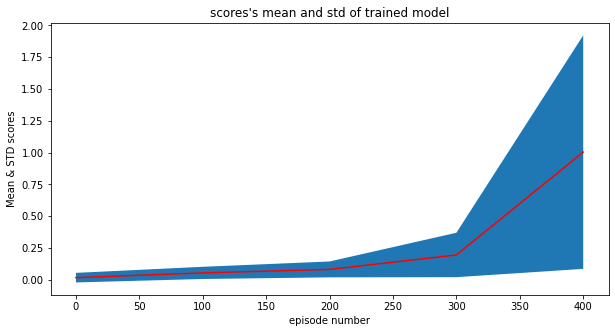

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
x = range(0, len(scores), 100)
y_mean = np.asarray(
    [np.mean(scores[i : i + 100]) for i in range(0, len(scores), 100)]
)
y_std = np.asarray(
    [np.std(scores[i : i + 100]) for i in range(0, len(scores), 100)]
)
ax.plot(
    x,
    y_mean,
    color="r",
)
ax.fill_between(x, y_mean - y_std, y_mean + y_std)
ax.set_title("scores's mean and std of trained model")
ax.set_ylabel("Mean & STD scores")
ax.set_xlabel("episode number")


Text(0.5, 1.0, 'scores of trained model')

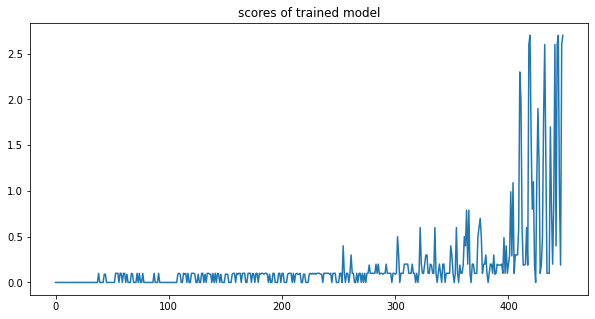

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(scores)
ax.set_title("scores of trained model")

### Discussion and Future work: 

* We managed to learn from multiple agents running in parallel and collecting samples to improve the policy. Clipping policy results, action, in the certain range could help agent to reach and stay in the target area. Usually applying large actions cause overshot and missing the target. 
* As we could expect the adding batch normalization layer to the sequential feed forward neural network improves the performance due to regularization effect. During the training phase each batch of samples has its own mean and standard deviation, which effect distribution of the activation values. Batch normalization set mean of all activation to zero.
* We could not get better performance by using prioritized experience replay buffer in comparison to regular experience buffer. 
* The idea for PER-buffer in [this work](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9169650) should investigated further and requires hyper parameter tuning. 
* In the future in order to achieve high performance on each algorithm we could use [bayesian hyperparameter optimization](https://github.com/fmfn/BayesianOptimization) and search for some of the key parameters which increase the quality of the results. 
* Training and [Alpha-Zero algorithm](https://arxiv.org/abs/1712.01815) to learn this game would the very interesting alternative
* To take one step further we could learn from raw pixels instead of the retrieved features. 
* One remaining important challenge is to build model which is robust to random initialization and could could converge consistently in short number of episodes.

